In [ ]:
# prompt: import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid")
# print("Path to dataset files:", path)

import os

# Assuming the download was successful and 'path' contains the directory
# where the dataset files were downloaded.
print("Contents of the downloaded dataset directory:")
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Now you can open and read the specific file you need, for example,
# if there's a CSV file named 'heart.csv' in the root of the downloaded directory.
# Make sure to replace 'heart.csv' with the actual filename you want to work with.
file_to_read = os.path.join(path, 'heart.csv')

try:
    with open(file_to_read, 'r') as f:
        # Process the file content here
        # For example, if it's a CSV, you might use pandas:
        # import pandas as pd
        # df = pd.read_csv(file_to_read)
        # print(df.head())

        # Or simply print the first few lines to inspect
        for i, line in enumerate(f):
            if i < 5: # Print the first 5 lines
                print(line.strip())
            else:
                break

except FileNotFoundError:
    print(f"Error: The file '{file_to_read}' was not found.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")



Path to dataset files: /kaggle/input/heart-attack-dataset-tarik-a-rashid


In [ ]:
# Librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para tests de normalidad
from scipy.stats import shapiro, normaltest
import scipy.stats as stats


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Medicaldataset.csv to Medicaldataset.csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['Medicaldataset.csv']))  # Cambia si el archivo se llama distinto
df.head()


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
# Resumen estadístico general
df.describe()


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [ ]:
vars_to_analyze = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"]

for var in vars_to_analyze:
    print(f"\n=== Variable: {var} ===")
    print("Media:", df[var].mean())
    print("Desviación estándar:", df[var].std())
    print("Asimetría:", df[var].skew())
    print("Curtosis:", df[var].kurtosis())



=== Variable: Age ===
Media: 56.191811978771796
Desviación estándar: 13.647315476078813
Asimetría: -0.23921873824246861
Curtosis: -0.023992066974543924

=== Variable: Gender ===
Media: 0.6595905989385898
Desviación estándar: 0.4740265793910911
Asimetría: -0.6743628337800194
Curtosis: -1.5475836735054347

=== Variable: Heart rate ===
Media: 78.3366186504928
Desviación estándar: 51.63027000675615
Asimetría: 18.24771989662879
Curtosis: 362.9547026291248

=== Variable: Systolic blood pressure ===
Media: 127.17058377558757
Desviación estándar: 26.12272045584132
Asimetría: 0.6852460958110306
Curtosis: 0.9519274464977725

=== Variable: Diastolic blood pressure ===
Media: 72.26914329037149
Desviación estándar: 14.033924163048708
Asimetría: 0.48920228416877803
Curtosis: 0.8653222430996901

=== Variable: Diastolic blood pressure ===
Media: 72.26914329037149
Desviación estándar: 14.033924163048708
Asimetría: 0.48920228416877803
Curtosis: 0.8653222430996901

=== Variable: Blood sugar ===
Media: 1

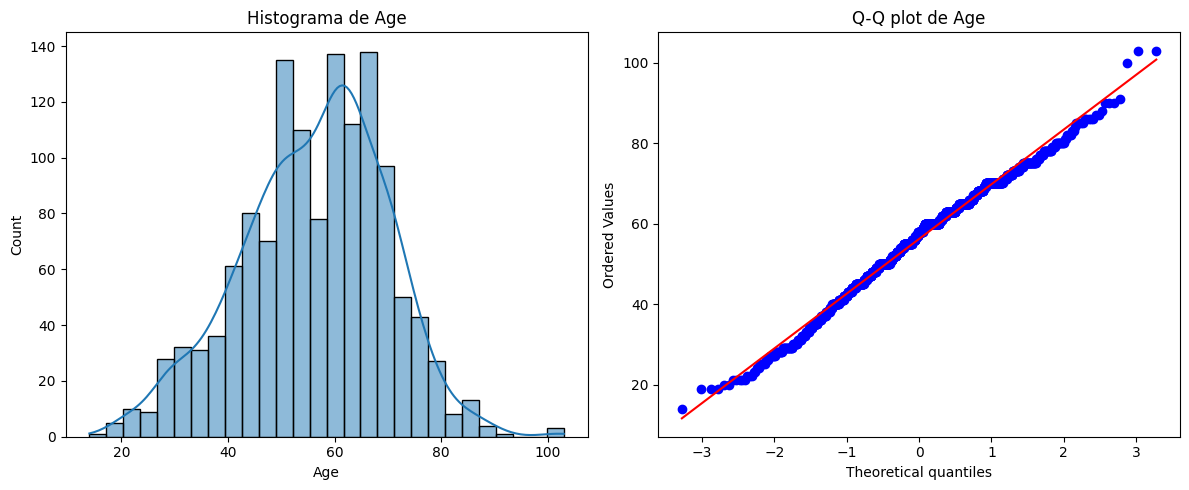

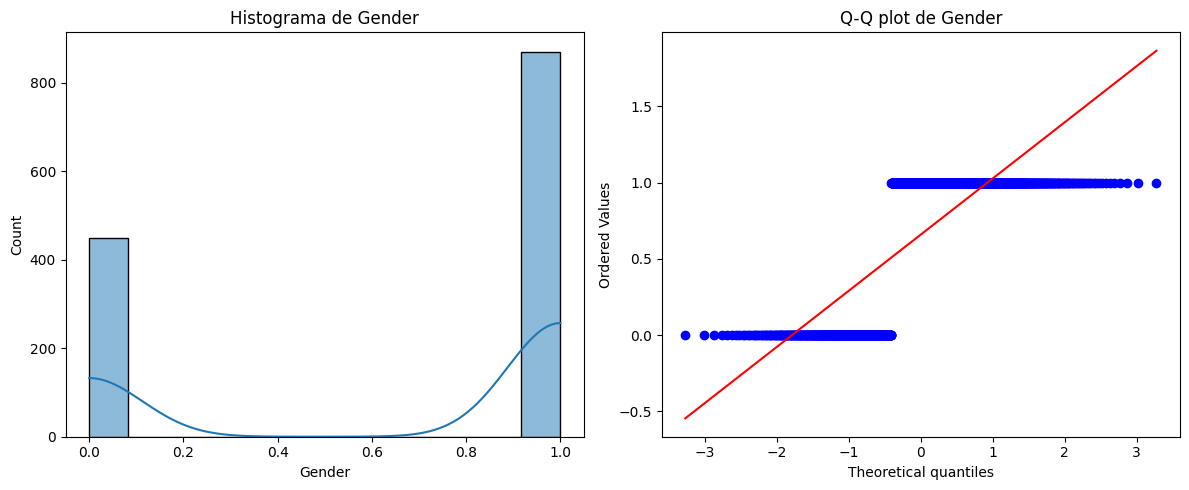

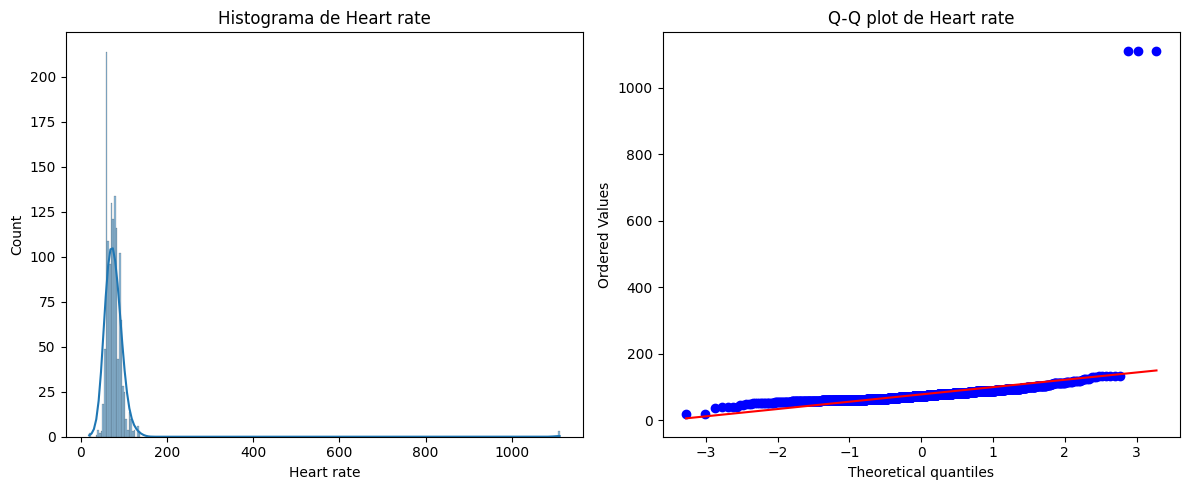

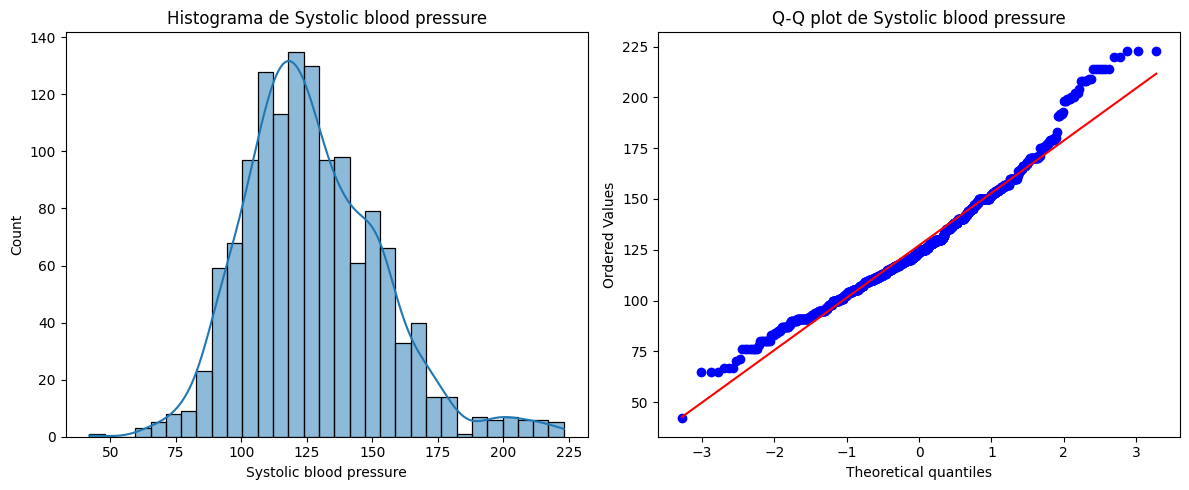

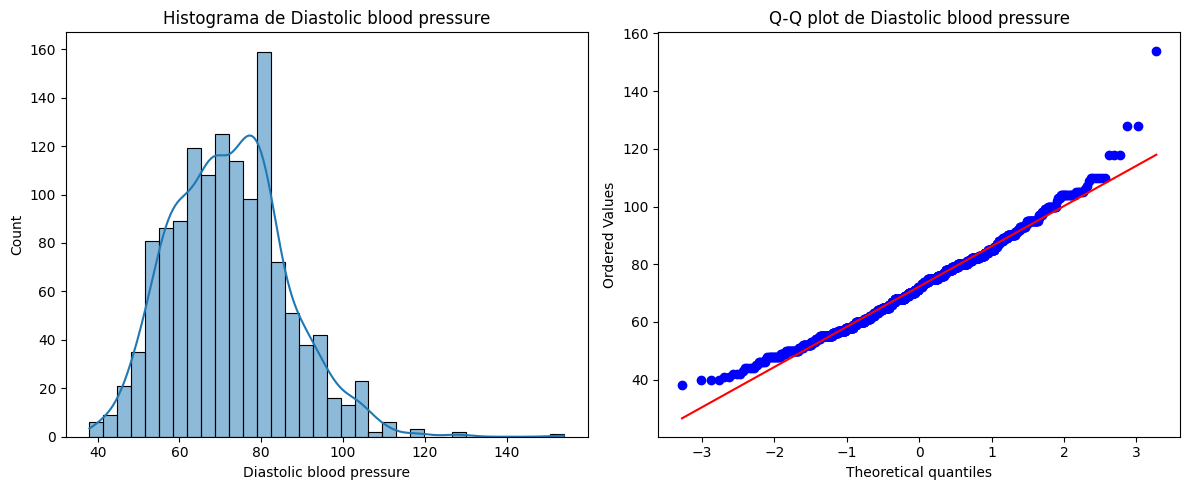

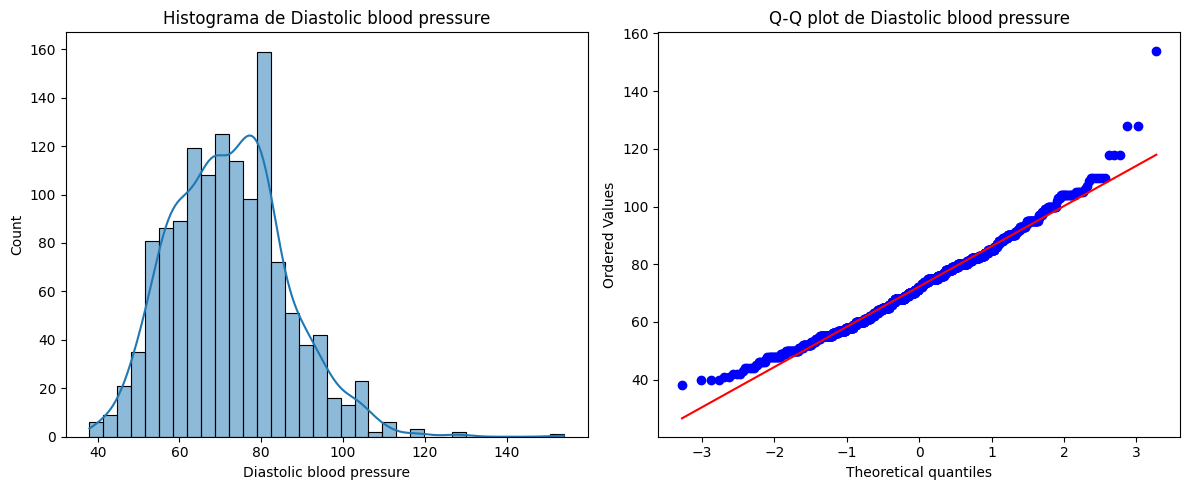

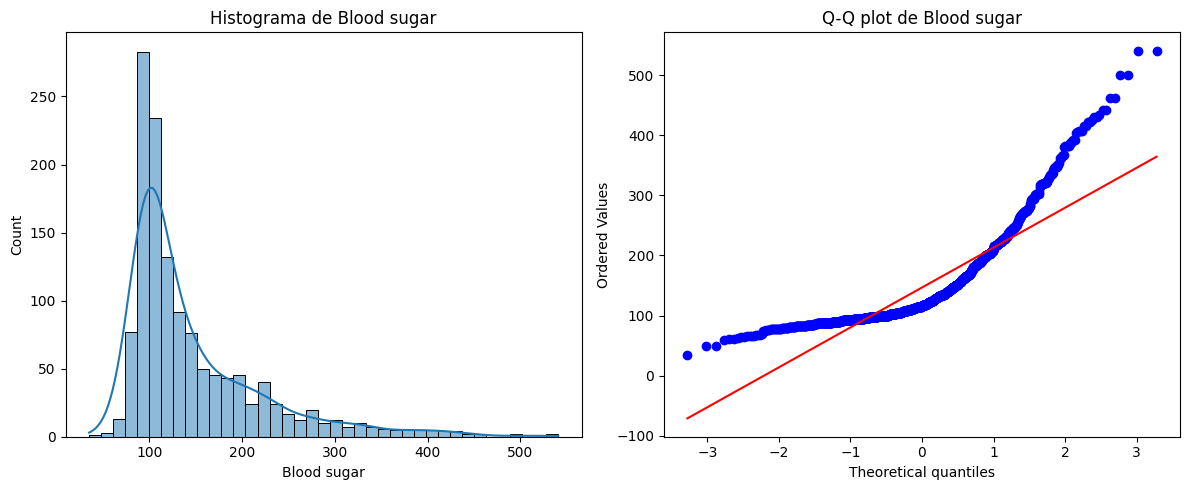

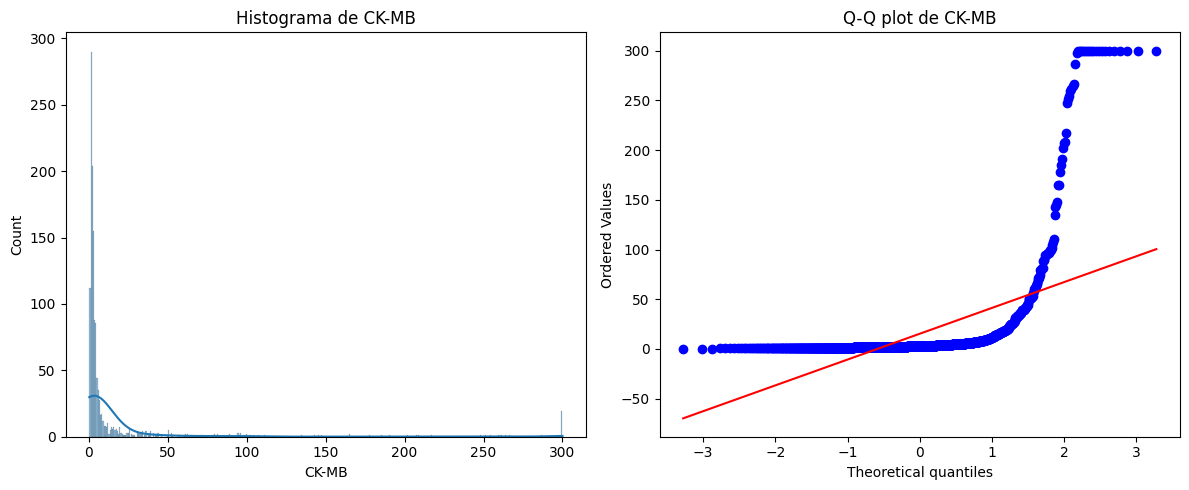

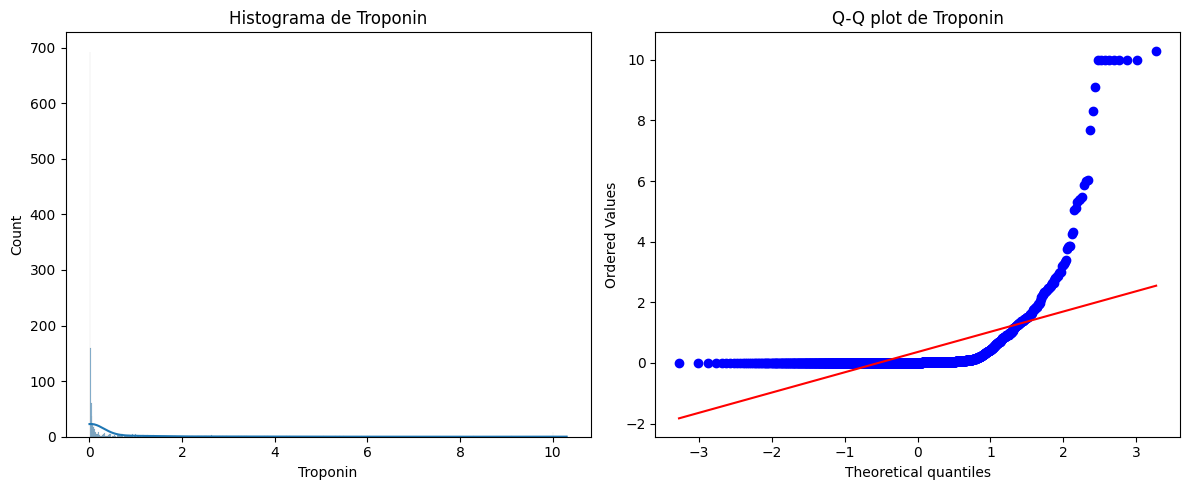

In [ ]:
for var in vars_to_analyze:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma de {var}')

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q plot de {var}')

    plt.tight_layout()
    plt.show()


In [ ]:
for var in vars_to_analyze:
    print(f"\n--- {var} ---")

    # Shapiro-Wilk
    stat, p = shapiro(df[var])
    print(f"Shaphiro-Wilk: p = {p:.5f} {'→ NO normal' if p < 0.05 else '→ Normal'}")

    # D’Agostino-Pearson
    stat, p = normaltest(df[var])
    print(f"Normaltest: p = {p:.5f} {'→ NO normal' if p < 0.05 else '→ Normal'}")



--- Age ---
Shapiro-Wilk: p = 0.00000 → NO normal
Normaltest: p = 0.00207 → NO normal

--- Gender ---
Shapiro-Wilk: p = 0.00000 → NO normal
Normaltest: p = 0.00000 → NO normal

--- Heart rate ---
Shapiro-Wilk: p = 0.00000 → NO normal
Normaltest: p = 0.00000 → NO normal

--- Systolic blood pressure ---
Shapiro-Wilk: p = 0.00000 → NO normal
Normaltest: p = 0.00000 → NO normal

--- Diastolic blood pressure ---
Shapiro-Wilk: p = 0.00000 → NO normal
Normaltest: p = 0.00000 → NO normal

--- Diastolic blood pressure ---
Shapiro-Wilk: p = 0.00000 → NO normal
Normaltest: p = 0.00000 → NO normal

--- Blood sugar ---
Shapiro-Wilk: p = 0.00000 → NO normal
Normaltest: p = 0.00000 → NO normal

--- CK-MB ---
Shapiro-Wilk: p = 0.00000 → NO normal
Normaltest: p = 0.00000 → NO normal

--- Troponin ---
Shapiro-Wilk: p = 0.00000 → NO normal
Normaltest: p = 0.00000 → NO normal


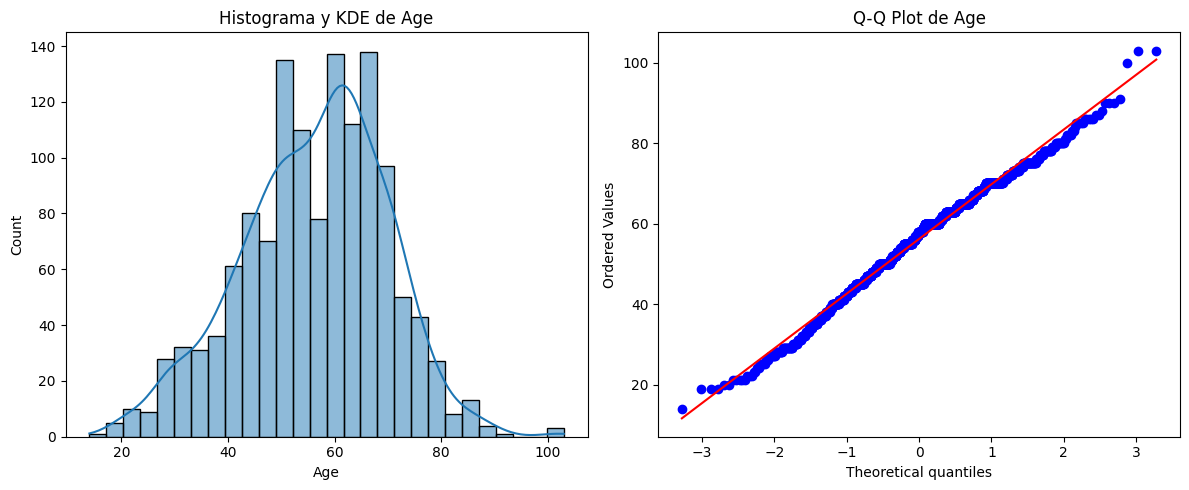

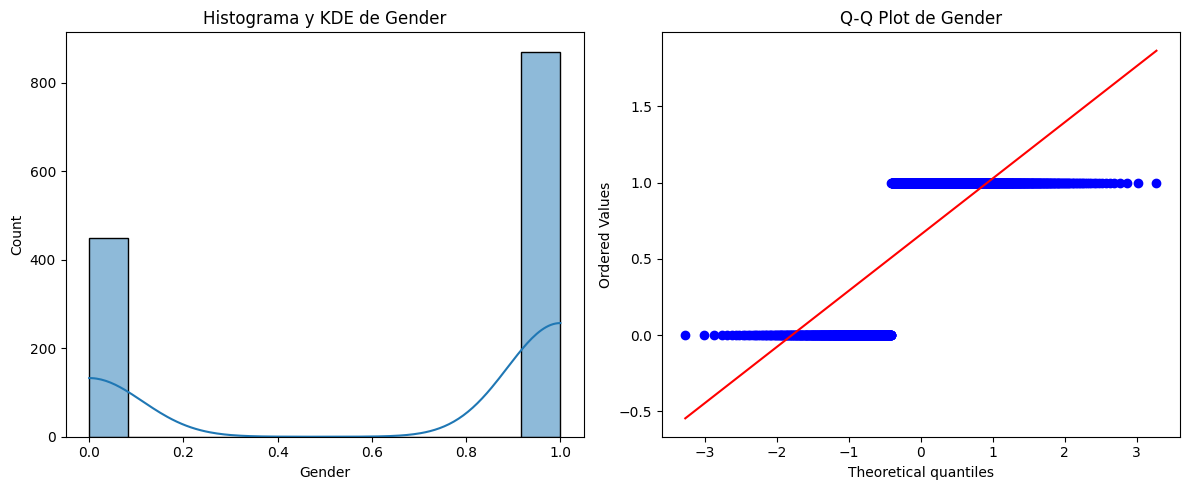

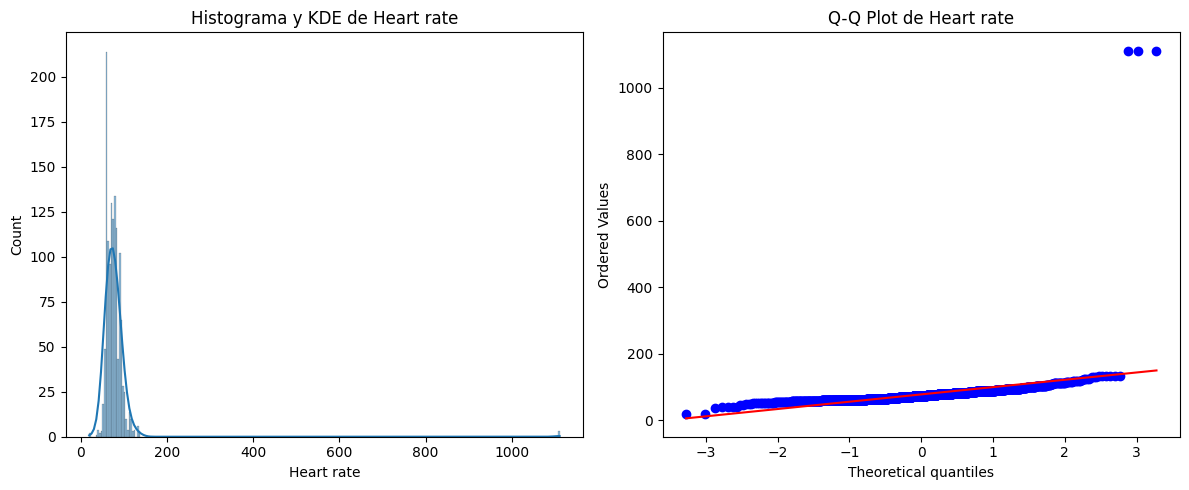

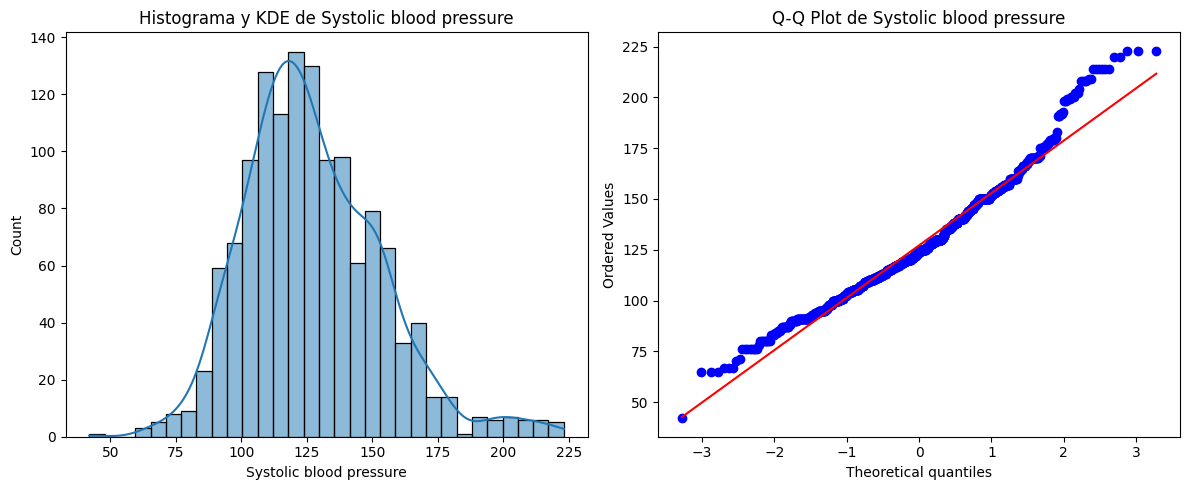

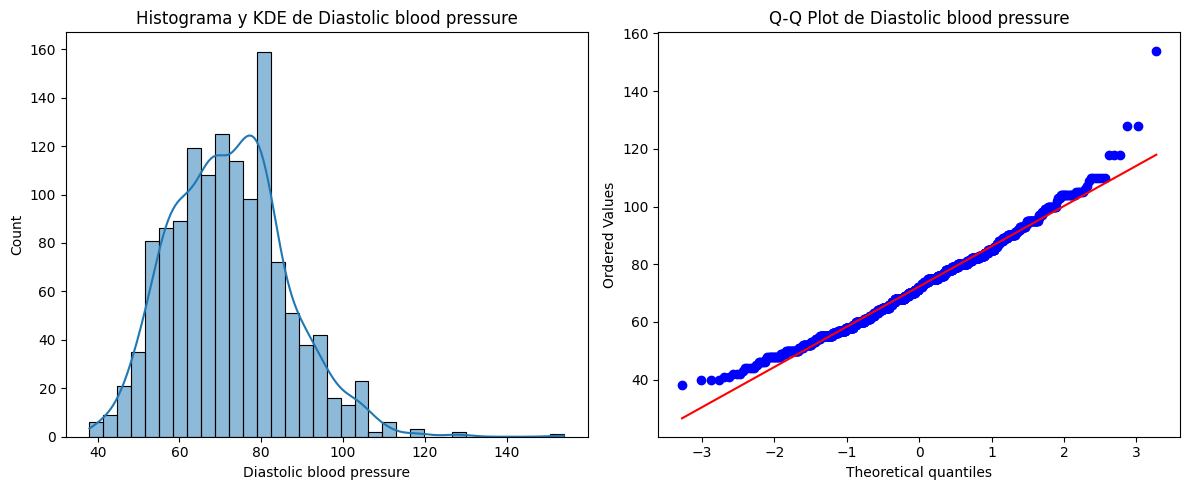

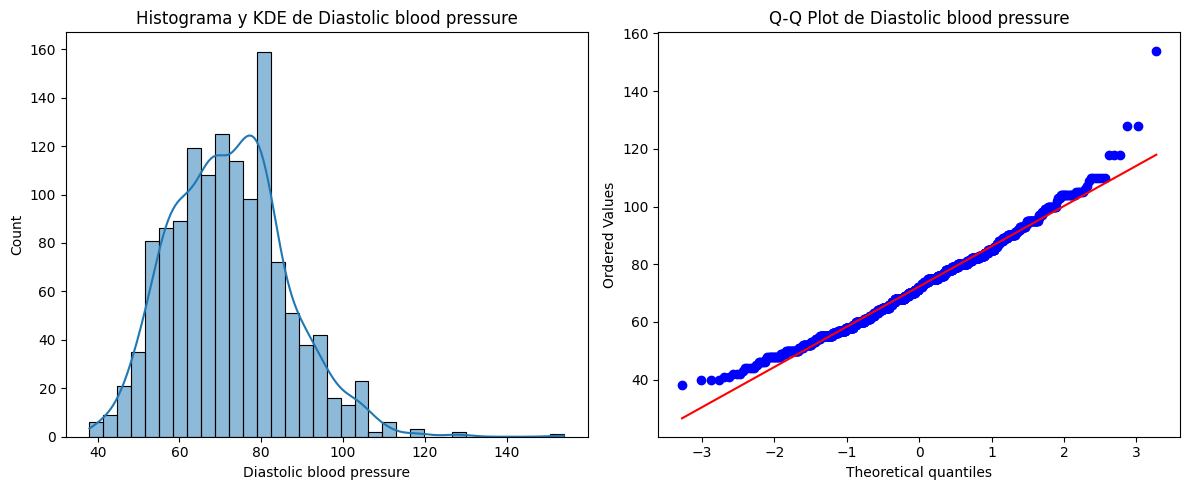

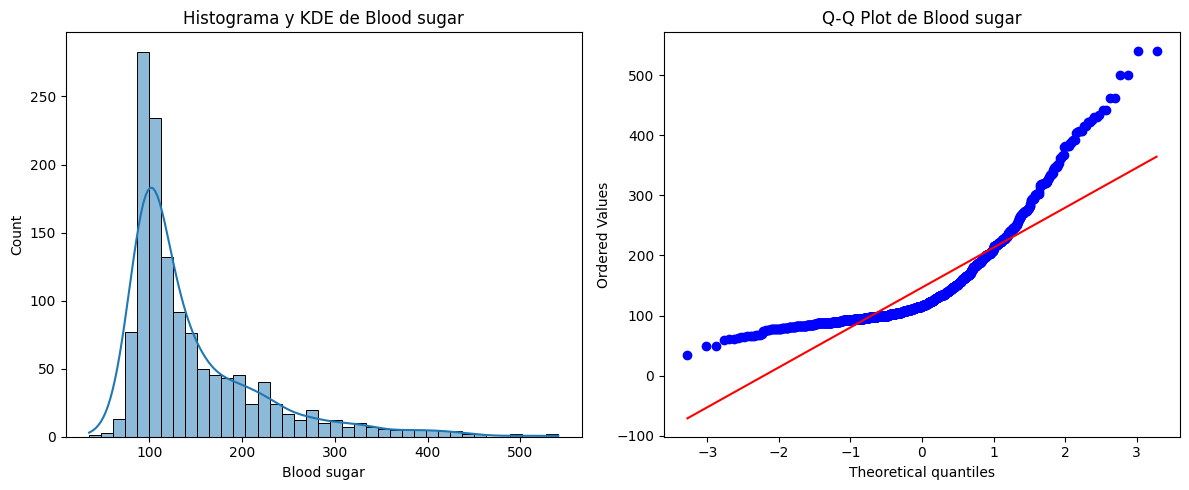

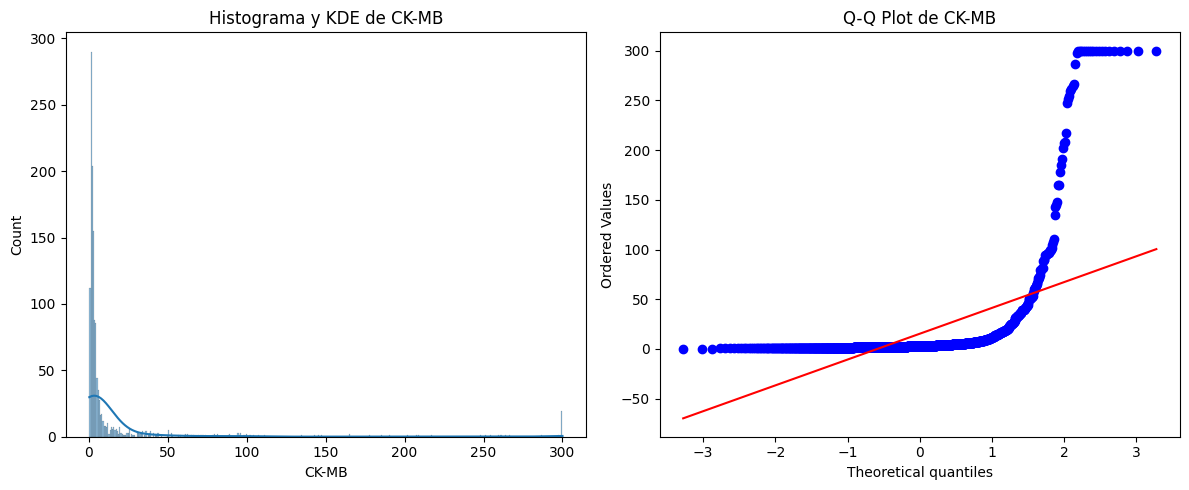

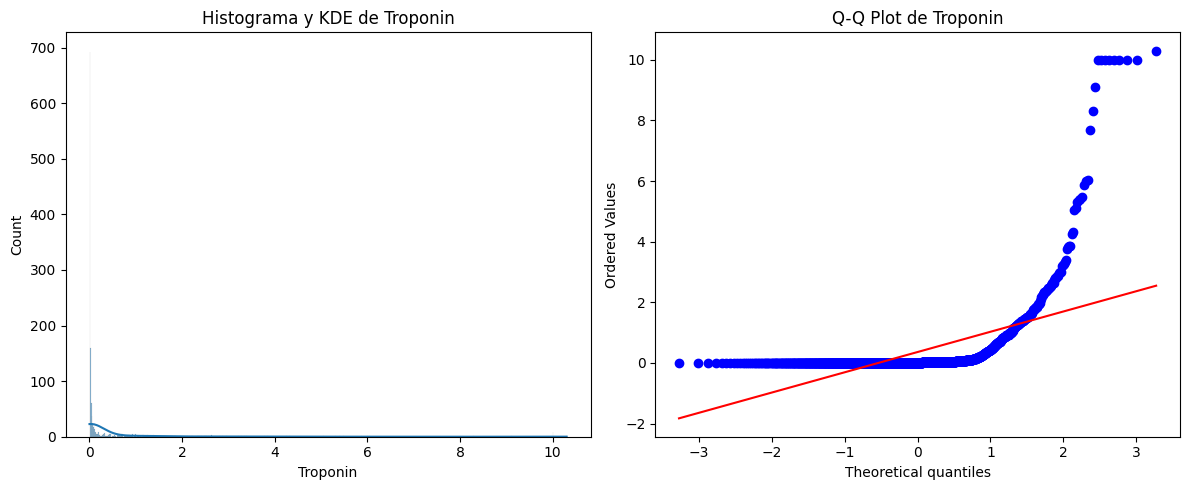

In [ ]:
for var in ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"]:
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma y KDE de {var}')

    plt.subplot(1,2,2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {var}')

    plt.tight_layout()
    plt.show()


In [ ]:
df['Gender'].value_counts(normalize=True)



,proportion
Gender,
1,0.659591
0,0.340409


la variable X no sigue una distribución normal (p < 0.001), pero visualmente se aproxima, y será usada en modelos que no requieren normalidad estricta

In [ ]:
for var in ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"]:
    print(f"{var} → skew: {df[var].skew():.2f}, kurtosis: {df[var].kurtosis():.2f}")



Age → skew: -0.24, kurtosis: -0.02
Gender → skew: -0.67, kurtosis: -1.55
Heart rate → skew: 18.25, kurtosis: 362.95
Systolic blood pressure → skew: 0.69, kurtosis: 0.95
Diastolic blood pressure → skew: 0.49, kurtosis: 0.87
Diastolic blood pressure → skew: 0.49, kurtosis: 0.87
Blood sugar → skew: 1.93, kurtosis: 4.12
CK-MB → skew: 4.98, kurtosis: 25.49
Troponin → skew: 5.80, kurtosis: 40.02


Saving Medicaldataset.csv to Medicaldataset (3).csv


KeyError: 'Medicaldataset.csv'

In [ ]:
filename = list(uploaded.keys())[0]  # toma automáticamente el primer archivo subido
df = pd.read_csv(io.BytesIO(uploaded[filename]))


Saving Medicaldataset.csv to Medicaldataset (4).csv


KeyError: 'Medicaldataset.csv'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files

# Check if 'uploaded' is already defined (from a previous files.upload())
# If not, prompt the user to upload the file
try:
    uploaded
except NameError:
    print("Please upload the dataset file.")
    uploaded = files.upload()

# Assuming the file was uploaded and 'uploaded' is now populated
# Get the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]  # takes the first uploaded file name automatically
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Supongamos que ya tienes cargado el dataset en df

# 1. Frecuencia absoluta (conteo de hombres y mujeres)
frecuencias = df['Gender'].value_counts()
print("Frecuencia absoluta:\n", frecuencias)

# 2. Frecuencia relativa (proporción de hombres y mujeres)
proporciones = df['Gender'].value_counts(normalize=True)
print("\nFrecuencia relativa:\n", proporciones)

# 3. Crear un gráfico de barras para visualizar distribución
sns.countplot(x='Gender', data=df)

# Cambiar etiquetas para que sea más claro
plt.xticks(ticks=[0,1], labels=['Mujer', 'Hombre'])
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')

plt.show()

Please upload the dataset file.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Crear una versión "limpia" del dataset
df_clean = df[df['Heart rate'] <= 700]

# 2. Histograma + KDE
sns.histplot(df_clean['Heart rate'], kde=True, bins=30)
plt.title('Histograma de Heart Rate (sin outliers >700)')
plt.xlabel('Heart Rate')
plt.ylabel('Frecuencia')
plt.show()

# 3. QQ Plot
stats.probplot(df_clean['Heart rate'], dist="norm", plot=plt)
plt.title("QQ Plot - Heart Rate (sin outliers >700)")
plt.show()

NameError: name 'df' is not defined